### BCW Classification using k-Nearest Neighbors

### Data set: [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

In [1]:
import math
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import seaborn as seab

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('bc.csv')
print(len(dataset))
dataset.replace('?', 0, inplace=True)
dataset['Class'].replace({2:1, 4:0}, inplace=True)
print(dataset.tail())

699
     Sample_Code_No  Clump_Thickness  Cell_Size_Uniformity  \
694          776715                3                     1   
695          841769                2                     1   
696          888820                5                    10   
697          897471                4                     8   
698          897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
694                      1                  1                            3   
695                      1                  1                            2   
696                     10                  3                            7   
697                      6                  4                            3   
698                      8                  5                            4   

     Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
694            2                1                1        1      1  
695            1

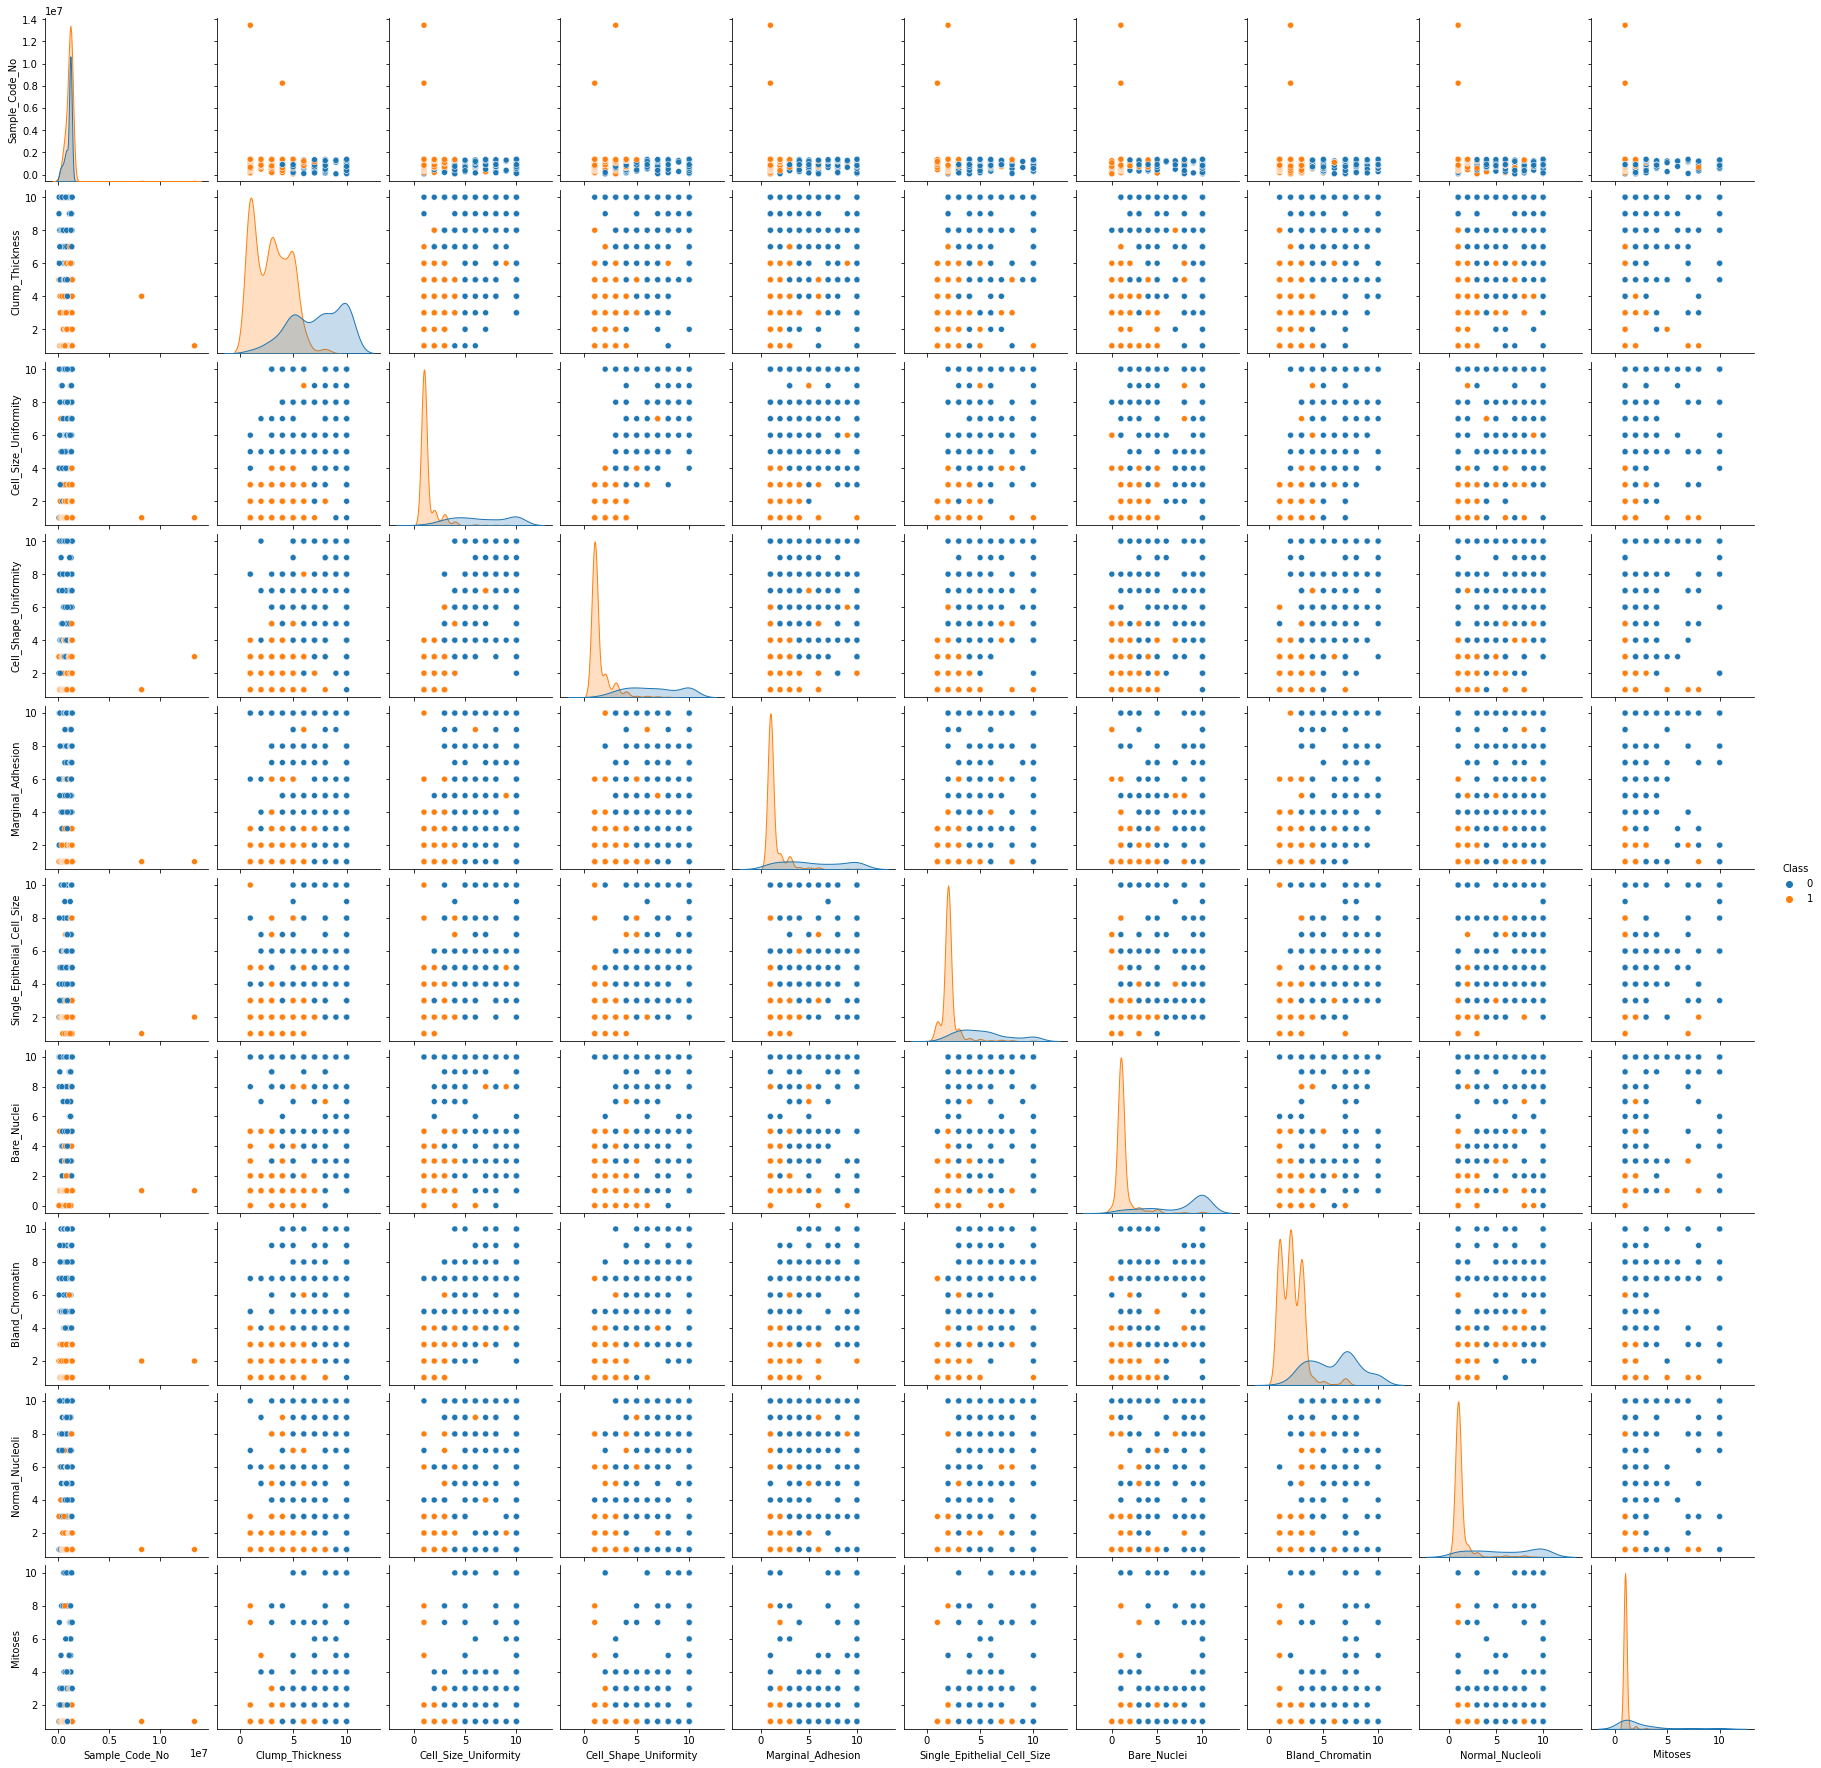

In [3]:
seab.pairplot(dataset, hue='Class')

In [4]:
# Split dataset
X = dataset.iloc[:, 1:10]
y = dataset.iloc[:, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [5]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
print(len(y_train))
k = int(round(math.sqrt(len(y_train))))
if (k % 2) == 0:
    k -= 1
print(k)

489
21


In [7]:
# Define the model (kNN)
classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')

In [8]:
# Fit the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [9]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

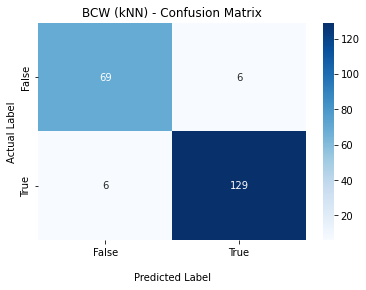

In [10]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
#print(cm)
cmm = seab.heatmap(cm, annot=True, fmt='g', cmap='Blues')
cmm.set_title('BCW (kNN) - Confusion Matrix')
cmm.set_xlabel('\nPredicted Label')
cmm.set_ylabel('Actual Label')
cmm.xaxis.set_ticklabels(['False','True'])
cmm.yaxis.set_ticklabels(['False','True'])
plot.show()

In [11]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        75
           1       0.96      0.96      0.96       135

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



In [12]:
print('Accuracy: ' + '{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('F1 Score: ' + '{:.4f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.9429
F1 Score: 0.9556
